In [ ]:
#!pip3 install -U pandas-profiling[notebook]
#pip3 install MarkupSafe
#!jupyter nbextension enable --py widgetsnbextension
#!pip install pandas_profiling
#!pip install markupsafe==2.0.1
#!pip install --user --upgrade aws-sam-cli




Author: IPBA Group
Description: Analysze and predict promotion

In [ ]:
# Import some required packages/libraries

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

%matplotlib inline

sns.set_style(style = "darkgrid")
plt.rcParams['figure.figsize'] = [5.0, 8.0] # make plot sizes, relatively larger than the normal notebook


In [ ]:
#pip install pandas-profiling 
from pandas_profiling import ProfileReport

In [ ]:
os.getcwd()

'C:\\Users\\hp\\Desktop\\PYTHON'

In [ ]:
# Change the current working directory
#os.chdir('File Address')

In [ ]:
#Load the dataset
promo = pd.read_csv("C:/Users/hp/Desktop/PYTHON/BYOP GG HR Analytics Promotion prediction Raw Data File.csv") #, index_col = ["employee_id"])

In [ ]:
promo.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49.0,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60.0,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50.0,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50.0,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73.0,0


In [ ]:
#to check column name for spaces
print(promo.columns)

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'awards_won', 'avg_training_score', 'is_promoted'],
      dtype='object')


In [ ]:
#Normalization vs Standardization 

#Perform Scaling for - KNN, Kmeans, CNN -
#Do not perform scaling for - Decision Tree, Random Forest, XG Boost, Bagging and boosting technique

#called as feature scaling
#Normalization: To reduce the dimension of Data, if there is large difference in the values present in the column
#to bring the values b/w 0 and 1, one use Normalization


##Code: from sk.preprocessing import MinMaxScalar
#scaling=MinMaxScalar()
#scaling.fit_transform(df['Col1', 'col2'])


##Standardization(z-score Normalization) z - (x-mu)/sigma

#code: from sk.preprocessing import StandardScalar
#scaling = Standardscalar()
#scaling.fit_transform(df['Col1', 'col2'])


In [ ]:
#Outlier detection technique

#z-score - z - (x-mu)/sigma   condition - for Std Normal distribution(SND) mu = 0 and sigma = 1
#IQR - 75% - 25% is inter quartile range


#ways to find outlier

# 1. Scatter Plot
# 2. Box Plot
# 3. using z score
# 4. using the IQR


### 3. using z score - function to detect outlier

#outlier=[]
#    def detect_outliers(data):
#        threshold=3
#        mean = np.mean(data)
#        std = np.std(data)
#        
#        for i in data:
#                z_score = (i - mean)/std
#                if np.abs(z_score) > thershold:
#                    outlier.append(i)
#                return outliers
            
#outlier_pt = detect_outliers(dataset)
#outlier_pt



### 4. using the IQR

#Steps:
#    1. Arrange the data in ascending order
#    2. Cal the first Quartile and 3rd Quartile
#    3. Find q3 - q1
#    4. Find lower bound value q1*1.5
#    5. Find Upper bound value q3*1.5
#code:    
#q1, q3 = np.percentile(dataset,[25,75])
#print(q1,q3)

#find the IQR

#iqr_value = q3-q1
#print(iqr_value)

lower_bound_val = q1 -(1.5*iqr_value)
Upper_bound_val = q3 +(1.5*iqr_value)

anything outside above mentioned range is an outlier 

In [ ]:
#PCA - Principal component Analysis - also called as dimensionality reduction
#we need to remove inconsistency, redundant data and highly correlated data 
# Steps: 
#        1. Standardization of data - scaling the values in such as way that all values lies in similar range
#        2. Computing covariance matrix - Correlation b/w the different variables of the dataset
#        3. Calculate the eigenvetors and eigenvalues - 
#        4. Computing the principal component
#        5. Reducing the dimension of the data 



In [ ]:
#to replace space in all column name at once
#promo.columns = promo.columns.str.strip() # Leading and trailing
#promo.columns = promo.columns.str.lstrip() # Leading only
#promo.columns = promo.columns.str.rstrip() # Trailing only
#promo.columns = promo.columns.str.replace(' ','_') #to replace space in column with other underscore

In [ ]:
# Complete EDA in one command 
#promo.profile_report()

In [ ]:
#Distribution analysis of numerical and categorical columns
promo.describe(include = 'all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
employee_id,54808.0,NaN,NaN,NaN,39195.830627,22586.581449,1.0,19669.75,39225.5,58730.5,78298.0
department,54808,9,Sales & Marketing,16840,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region,54808,34,region_2,12343,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,52399,3,Bachelor's,36669,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,54808,2,m,38496,NaN,NaN,NaN,NaN,NaN,NaN,NaN
recruitment_channel,54808,3,other,30446,NaN,NaN,NaN,NaN,NaN,NaN,NaN
no_of_trainings,54808.0,NaN,NaN,NaN,1.253011,0.609264,1.0,1.0,1.0,1.0,10.0
age,54808.0,NaN,NaN,NaN,34.803915,7.660169,20.0,29.0,33.0,39.0,60.0
previous_year_rating,50684.0,NaN,NaN,NaN,3.329256,1.259993,1.0,3.0,3.0,4.0,5.0
length_of_service,54808.0,NaN,NaN,NaN,5.865512,4.265094,1.0,3.0,5.0,7.0,37.0


In [ ]:
promo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  awards_won            54808 non-null  int64  
 11  avg_training_score    52248 non-null  float64
 12  is_promoted           54808 non-null  int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 5.4+ MB


In [ ]:
# to find duplicates if any 
promo.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
54803    False
54804    False
54805    False
54806    False
54807    False
Length: 54808, dtype: bool

<AxesSubplot:xlabel='is_promoted', ylabel='count'>

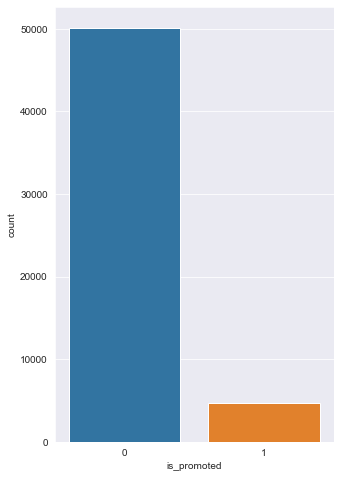

In [ ]:
sns.countplot(x = "is_promoted", data = promo)

Label is imbalanced - we will have to balances the classes for modelling
Theory (Why)

Note: Only 1/10th of the employees promoted  

<AxesSubplot:xlabel='is_promoted', ylabel='count'>

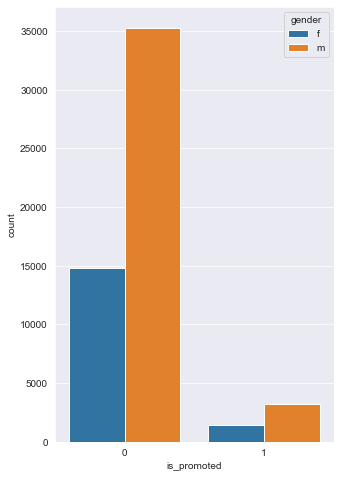

In [ ]:
sns.countplot(x = "is_promoted", hue = "gender", data = promo)

Note: It seems there is no such bias in giving promotion.

<AxesSubplot:xlabel='is_promoted', ylabel='count'>

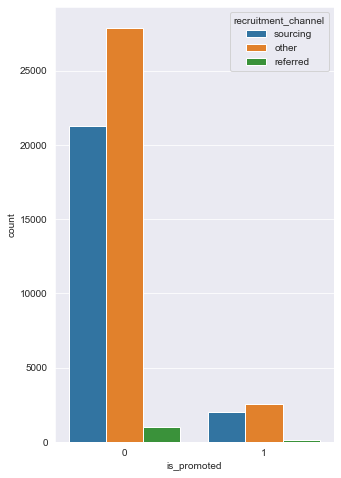

In [ ]:
sns.countplot(x = "is_promoted", hue = "recruitment_channel", data = promo)

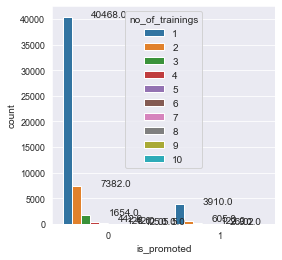

In [ ]:
fig = plt.figure(figsize =(4, 4))
#Set axis parameter font size
plt.tick_params(axis='both', which='major', labelsize=9)
ax = sns.countplot(x = "is_promoted", hue = "no_of_trainings", data = promo)
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

<AxesSubplot:xlabel='is_promoted', ylabel='count'>

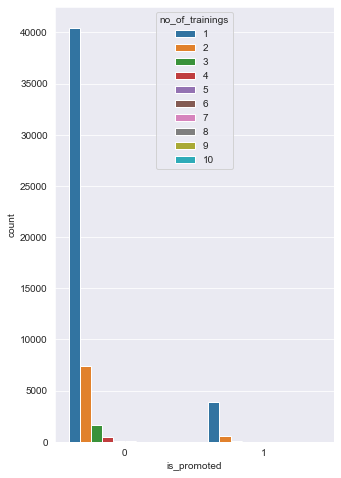

In [ ]:
sns.countplot(x = "is_promoted", hue = "no_of_trainings", data = promo)

In [ ]:
# groupby and count()
mean_ages = promo.groupby(['gender','education'])['is_promoted'].count()
display(mean_ages)

gender  education       
f       Bachelor's          10854
        Below Secondary       289
        Master's & above     4778
m       Bachelor's          25815
        Below Secondary       516
        Master's & above    10147
Name: is_promoted, dtype: int64

In [ ]:
# groupby and count()
mean_ages = promo.groupby(['education'])['education'].count()
display(mean_ages)

education
Bachelor's          36669
Below Secondary       805
Master's & above    14925
Name: education, dtype: int64

In [ ]:
# groupby and Mean()
mean_ages1 = promo.groupby(['gender','education'])['age'].mean()
display(mean_ages1)

gender  education       
f       Bachelor's          33.440667
        Below Secondary     23.598616
        Master's & above    39.289242
m       Bachelor's          33.447143
        Below Secondary     23.968992
        Master's & above    39.382478
Name: age, dtype: float64

In [ ]:
# To check the correlation among numerical columns
promo.select_dtypes(['float64','int64']).corr()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
employee_id,1.000000,-0.005121,0.000437,0.004533,0.001274,0.008420,-0.000661,0.001206
no_of_trainings,-0.005121,1.000000,-0.081278,-0.063126,-0.057275,-0.007628,0.044430,-0.024896
age,0.000437,-0.081278,1.000000,0.006008,0.657111,-0.008169,-0.049500,-0.017166
previous_year_rating,0.004533,-0.063126,0.006008,1.000000,0.000253,0.027738,0.075474,0.159320
length_of_service,0.001274,-0.057275,0.657111,0.000253,1.000000,-0.039927,-0.039381,-0.010670
awards_won,0.008420,-0.007628,-0.008169,0.027738,-0.039927,1.000000,0.073963,0.195871
avg_training_score,-0.000661,0.044430,-0.049500,0.075474,-0.039381,0.073963,1.000000,0.184386
is_promoted,0.001206,-0.024896,-0.017166,0.159320,-0.010670,0.195871,0.184386,1.000000


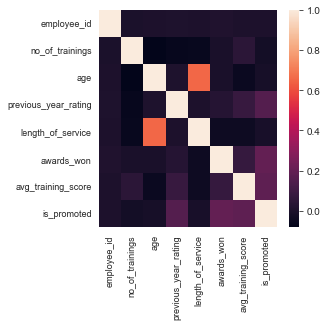

In [ ]:
#Set plot size
fig = plt.figure(figsize =(4, 4))
#Set axis parameter font size
plt.tick_params(axis='both', which='major', labelsize=9)

sns.heatmap(promo.select_dtypes(['float64' , 'int64']).corr())
plt.show()

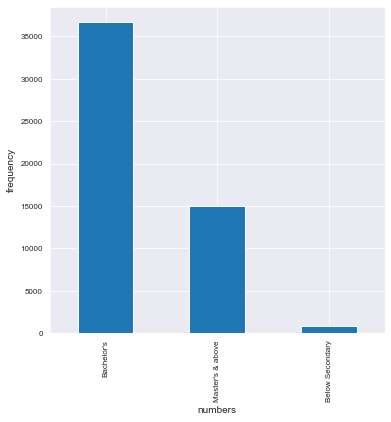

In [ ]:

fig, ax = plt.subplots(figsize =(6, 6))

#Set axis parameter font size
plt.tick_params(axis='both', which='major', labelsize=8)

promo['education'].value_counts().plot(ax=ax, kind='bar', xlabel='numbers', ylabel='frequency')
plt.show()


C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Number of Employees based on highest education level'}, xlabel='education', ylabel='count'>

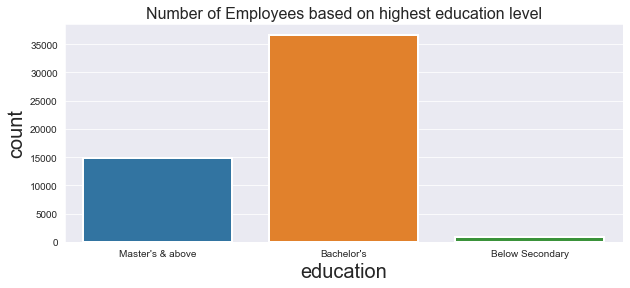

In [ ]:
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(10,4))

# Set label for x-axis
ax.set_xlabel( "Education" , size = 20 )
  
# Set label for y-axis
ax.set_ylabel( "Number of Employees" , size = 20 )

# Set title for figure
plt.title( "Number of Employees based on highest education level" , size = 16 )

#Set axis parameter font size
plt.tick_params(axis='both', which='major', labelsize=10)

#Plot using Seaborn library
sns.set_context('poster')
sns.countplot('education',data = promo)

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='department', ylabel='count'>

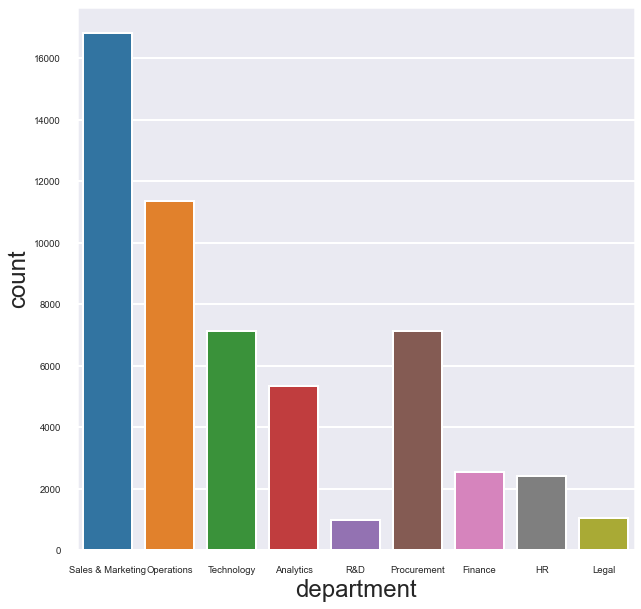

In [ ]:

fig, ax = plt.subplots(figsize=(10,10))
plt.tick_params(axis='both', which='major', labelsize=9.5)
sns.set_context('poster')
sns.countplot('department',data = promo)

(array([  606., 10716.,  8466.,  9004.,  4571.,  4652.,  4915.,  7154.,
         1801.,   363.]),
 array([39., 45., 51., 57., 63., 69., 75., 81., 87., 93., 99.]),
 <BarContainer object of 10 artists>)

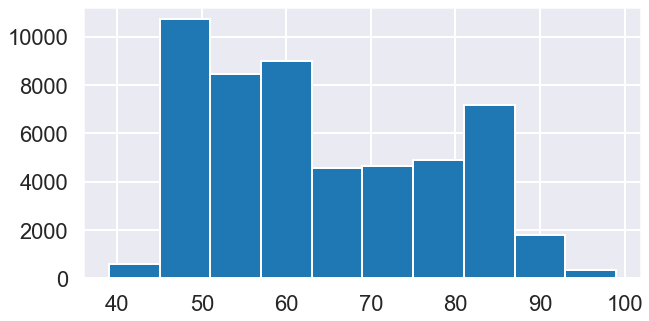

In [ ]:
fig = plt.figure(figsize =(10, 5))
plt.hist(promo["avg_training_score"])

(array([  870.,  7031., 13751., 12531.,  8300.,  5093.,  2861.,  1908.,
         1322.,  1141.]),
 array([20., 24., 28., 32., 36., 40., 44., 48., 52., 56., 60.]),
 <BarContainer object of 10 artists>)

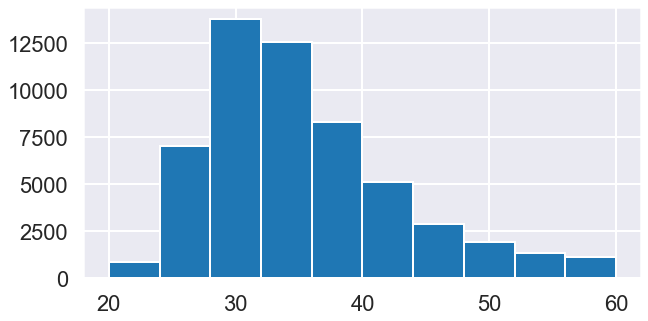

In [ ]:
fig = plt.figure(figsize =(10, 5))
plt.hist(promo["age"])

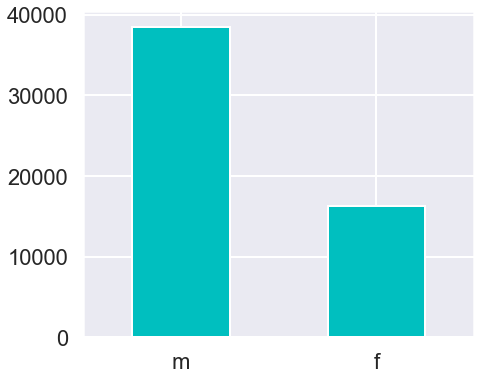

In [ ]:
gender = promo['gender'].value_counts()
plt.figure(figsize=(7, 6))
ax = gender.plot(kind='bar', rot=0, color="c")

In [ ]:
#Scatter Plot
#sns.scatterplot(promo['awards_won'],promo['avg_training_score'])

# Draw a pair plot

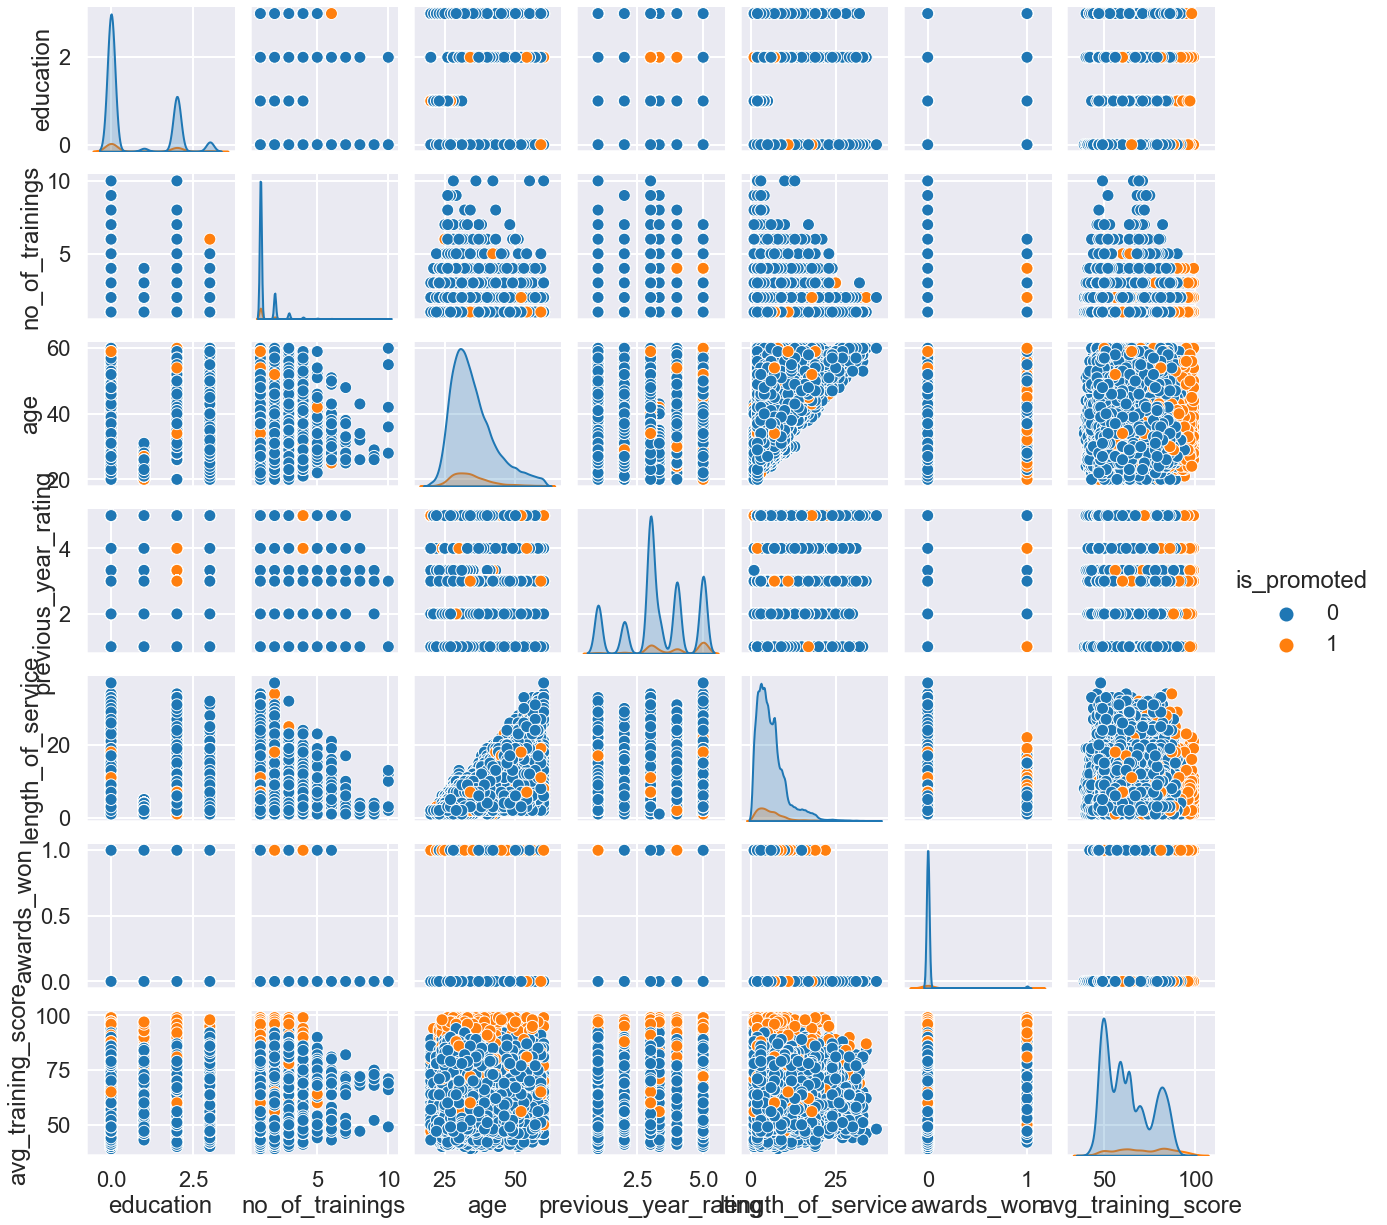

In [ ]:
sns.pairplot(promo,hue = 'is_promoted')


#Here if in this pair plot mostly the data points of two independent variables can be seperated by linear line 
#and there is no overlapping use Logistic regression for classification problem.
#If the data points are overlapping (50%) use either decision tree or random forest or XG boost (ensemble methods)
#If alomost all the data points are overlapping use KNN (it is based on eucledian distance .

In [ ]:
#Feature Scaling
#1.Standard scalar scaling - to scale down value for large values 
#only for Linear regression/KNN/CNN/RNN

from sk.preprocessing import StandardScalar


ModuleNotFoundError: No module named 'sk'

# Treatment of Missing values

In [ ]:
#We can drop the null value rows if they are very less as compare to the data, using the code below:
#df.dropna(inplace = True)

In [ ]:
# Sum of null values in each column
promo.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
awards_won                 0
avg_training_score      2560
is_promoted                0
dtype: int64

In [ ]:
#IMPORTANT:
#To treat missing values in a categorical column - apply classifier algo  - remove missing value from train dataset
# put missing value data in test dataset # run the model with train data set and predict the missing value from test data.

In [ ]:
#Finding the mean of the column having NaN
mean_value=promo['avg_training_score'].mean()
  
mean_value

63.71223778900628

In [ ]:
# Replace NaNs in column avg_training_score with the mean of values in the same column
promo['avg_training_score'].fillna(value=mean_value, inplace=True)
print('Updated Dataframe:')
print(promo)

Updated Dataframe:
       employee_id         department     region         education gender  \
0            65438  Sales & Marketing   region_7  Master's & above      f   
1            65141         Operations  region_22        Bachelor's      m   
2             7513  Sales & Marketing  region_19        Bachelor's      m   
3             2542  Sales & Marketing  region_23        Bachelor's      m   
4            48945         Technology  region_26        Bachelor's      m   
...            ...                ...        ...               ...    ...   
54803         3030         Technology  region_14        Bachelor's      m   
54804        74592         Operations  region_27  Master's & above      f   
54805        13918          Analytics   region_1        Bachelor's      m   
54806        13614  Sales & Marketing   region_9               NaN      m   
54807        51526                 HR  region_22        Bachelor's      m   

      recruitment_channel  no_of_trainings  age  previou

In [ ]:
# Replace NaNs in column 'education' with dummy value 'NA' in the same column
promo['education'].fillna(value='NA', inplace=True)
print('Updated Dataframe:')
print(promo)

Updated Dataframe:
       employee_id         department     region         education gender  \
0            65438  Sales & Marketing   region_7  Master's & above      f   
1            65141         Operations  region_22        Bachelor's      m   
2             7513  Sales & Marketing  region_19        Bachelor's      m   
3             2542  Sales & Marketing  region_23        Bachelor's      m   
4            48945         Technology  region_26        Bachelor's      m   
...            ...                ...        ...               ...    ...   
54803         3030         Technology  region_14        Bachelor's      m   
54804        74592         Operations  region_27  Master's & above      f   
54805        13918          Analytics   region_1        Bachelor's      m   
54806        13614  Sales & Marketing   region_9                NA      m   
54807        51526                 HR  region_22        Bachelor's      m   

      recruitment_channel  no_of_trainings  age  previou

In [ ]:
#Finding the mean of the column having NaN
mean_value1=promo['previous_year_rating'].mean()
 
mean_value1

3.329255780917055

In [ ]:
# Replace NaNs in column avg_training_score with the mean of values in the same column
promo['previous_year_rating'].fillna(value=mean_value1, inplace=True)
print('Updated Dataframe:')
print(promo)

Updated Dataframe:
       employee_id         department     region         education gender  \
0            65438  Sales & Marketing   region_7  Master's & above      f   
1            65141         Operations  region_22        Bachelor's      m   
2             7513  Sales & Marketing  region_19        Bachelor's      m   
3             2542  Sales & Marketing  region_23        Bachelor's      m   
4            48945         Technology  region_26        Bachelor's      m   
...            ...                ...        ...               ...    ...   
54803         3030         Technology  region_14        Bachelor's      m   
54804        74592         Operations  region_27  Master's & above      f   
54805        13918          Analytics   region_1        Bachelor's      m   
54806        13614  Sales & Marketing   region_9                NA      m   
54807        51526                 HR  region_22        Bachelor's      m   

      recruitment_channel  no_of_trainings  age  previou

### rescale the entire dataset featuresto 0-1 

In [ ]:
promo.head(2)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49.0,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60.0,0


In [ ]:
# Trying Linear Regression Model and CHecking the Score

#from sklearn.linear_model import LinearRegression
#from sklearn.tree import DecisionTreeRegressor
#from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
#lr= LinearRegression()
#Fit X and y 
#lr.fit(X_train, Y_train)
#ypred = lr.predict(X_test)
#print(lr.score(X_train, Y_train))
#print(lr.score(X_test, Y_test))

In [ ]:
#to check column name for spaces
print(promo.columns)

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'awards_won', 'avg_training_score', 'is_promoted'],
      dtype='object')


In [ ]:
## Dropping columns:- employee_id, department, region, gender, recruitment_channel
promo.drop(['employee_id', 'department', 'region', 'gender', 'recruitment_channel'],axis=1,inplace=True)

In [ ]:
#to check column name for spaces
print(promo.columns)

Index(['education', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'awards_won', 'avg_training_score', 'is_promoted'],
      dtype='object')


In [ ]:
#One hot encoding to convert all categorical variable in integer


In [ ]:
#Checking for the labels in the categorical parameters 
print(promo['education'].unique())


["Master's & above" "Bachelor's" 'NA' 'Below Secondary']


In [ ]:
#Checking for the label counts in the categorical parameters
promo['education'].value_counts()


Bachelor's          36669
Master's & above    14925
NA                   2409
Below Secondary       805
Name: education, dtype: int64

In [ ]:
#To check unique value in the categorical or numerical value column
#df.col_name.unique()

In [ ]:
# One hot encoding
#df.get_dummies=df(['col_name']).head()
#dummy_data = pd.getdummies(df['col_name)'], drop_first = True) 
#when you are performing one hot encoding dont forget to delete one coulumn (dummy variable column)
#if you have more than 3 features in any column don't go for One hot Encoding

In [ ]:
#Label Encoding

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
promo['education'] = le.fit_transform(promo['education'])
promo

,education,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,2,1,35,5.0,8,0,49.000000,0
1,0,1,30,5.0,4,0,60.000000,0
2,0,1,34,3.0,7,0,50.000000,0
3,0,2,39,1.0,10,0,50.000000,0
4,0,1,45,3.0,2,0,73.000000,0
...,...,...,...,...,...,...,...,...
54803,0,1,48,3.0,17,0,78.000000,0
54804,2,1,37,2.0,6,0,56.000000,0
54805,0,1,27,5.0,3,0,79.000000,0
54806,3,1,29,1.0,2,0,63.712238,0


In [ ]:
##Splitting The Dataset: Train and Test dataset
# Dropping predicting columns

y = promo['is_promoted']
x = promo.drop(['is_promoted'], axis = 1)
y = pd.DataFrame(y)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)



In [ ]:
# Trying Logistic Regression Model and Checking the Score

In [ ]:
#Train The Model

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train, y_train)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [ ]:
x_test.dtypes

education                 int32
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
awards_won                int64
avg_training_score      float64
dtype: object

In [ ]:
#predictions on testing data.

In [ ]:
y_pred = classifier.predict(x_test)

In [ ]:
#Evaluation Metrics

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
 
print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[12538    10]
 [ 1076    78]]


In [ ]:
from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(y_test, y_pred))

Accuracy :  0.9207414975915925


In [ ]:
#L1 and L2

In [ ]:
#Selecting samples randomly based on condition
D1 = promo.query("is_promoted == 0").sample(n=4668)
D1

,education,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
54080,2,1,34,4.000000,8,0,53.0,0
4895,0,2,44,5.000000,12,0,82.0,0
2583,2,2,35,3.000000,7,0,58.0,0
30430,2,1,56,4.000000,18,0,47.0,0
14267,0,1,41,5.000000,7,0,52.0,0
...,...,...,...,...,...,...,...,...
9535,0,1,32,2.000000,5,0,81.0,0
40044,2,1,41,5.000000,3,0,59.0,0
10324,0,1,26,3.000000,3,0,89.0,0
40623,0,2,29,3.329256,1,0,68.0,0


### Use the default y_train to collect zeros and 1s and sample

In [ ]:
#Selecting samples randomly based on condition
D11 = promo.query("is_promoted == 0").sample(n=4668,random_state=000)
D11

,education,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
42171,2,1,40,3.000000,8,0,65.0,0
38509,1,1,24,3.000000,2,0,83.0,0
21895,0,1,34,3.000000,3,0,58.0,0
20022,0,3,49,3.000000,6,0,70.0,0
25016,2,1,26,3.329256,1,0,85.0,0
...,...,...,...,...,...,...,...,...
40089,0,1,42,3.000000,15,0,63.0,0
33100,0,1,32,1.000000,4,0,52.0,0
24037,3,1,27,3.000000,3,0,52.0,0
51189,0,1,29,3.329256,1,0,52.0,0


In [ ]:
#Selecting samples randomly based on condition
D111 = promo.query("is_promoted == 0").sample(n=4668,random_state=001)
D111

,education,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
18273,2,1,36,5.000000,2,0,58.000000,0
25551,0,1,28,5.000000,2,0,83.000000,0
37780,0,1,31,5.000000,7,0,63.712238,0
36327,0,2,28,3.000000,2,0,60.000000,0
41922,0,1,28,3.329256,1,0,48.000000,0
...,...,...,...,...,...,...,...,...
18392,0,1,51,1.000000,16,0,47.000000,0
19437,2,2,35,3.000000,7,0,57.000000,0
29260,0,1,28,3.329256,1,0,53.000000,0
36233,2,1,35,3.000000,6,0,63.712238,0


In [ ]:
promo[promo['is_promoted']==1].count()


education               4668
no_of_trainings         4668
age                     4668
previous_year_rating    4668
length_of_service       4668
awards_won              4668
avg_training_score      4668
is_promoted             4668
dtype: int64

In [ ]:
# selecting rows based on condition
D2 = promo[promo['is_promoted'] == 1]
D2

,education,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
11,0,1,35,5.000000,3,0,50.000000,1
39,0,1,33,5.000000,6,0,51.000000,1
60,2,1,50,4.000000,17,0,47.000000,1
66,0,1,27,3.329256,1,1,58.000000,1
67,0,1,27,3.329256,1,0,63.712238,1
...,...,...,...,...,...,...,...,...
54734,0,1,31,3.329256,1,0,56.000000,1
54757,2,1,54,4.000000,7,0,81.000000,1
54761,0,1,30,4.000000,2,0,86.000000,1
54792,0,1,59,3.000000,11,0,65.000000,1


In [ ]:
# merge two data frames (same column name)
print('After merging 1:')
Mer_Data1 = pd.concat([D1, D2], axis=0) #Axis = 0 to merge rows below and 1 for Columns 
Mer_Data1

After merging 1:


,education,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
54080,2,1,34,4.000000,8,0,53.0,0
4895,0,2,44,5.000000,12,0,82.0,0
2583,2,2,35,3.000000,7,0,58.0,0
30430,2,1,56,4.000000,18,0,47.0,0
14267,0,1,41,5.000000,7,0,52.0,0
...,...,...,...,...,...,...,...,...
54734,0,1,31,3.329256,1,0,56.0,1
54757,2,1,54,4.000000,7,0,81.0,1
54761,0,1,30,4.000000,2,0,86.0,1
54792,0,1,59,3.000000,11,0,65.0,1


In [ ]:
# merge two data frames (same column name)
print('After merging 2:')
Mer_Data2 = pd.concat([D11, D2], axis=0) #Axis = 0 to merge rows below and 1 for Columns 
Mer_Data2

After merging 2:


,education,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
42171,2,1,40,3.000000,8,0,65.0,0
38509,1,1,24,3.000000,2,0,83.0,0
21895,0,1,34,3.000000,3,0,58.0,0
20022,0,3,49,3.000000,6,0,70.0,0
25016,2,1,26,3.329256,1,0,85.0,0
...,...,...,...,...,...,...,...,...
54734,0,1,31,3.329256,1,0,56.0,1
54757,2,1,54,4.000000,7,0,81.0,1
54761,0,1,30,4.000000,2,0,86.0,1
54792,0,1,59,3.000000,11,0,65.0,1


In [ ]:
# merge two data frames (same column name)
print('After merging:')
Mer_Data3 = pd.concat([D111, D2], axis=0) #Axis = 0 to merge rows below and 1 for Columns 
Mer_Data3

After merging:


,education,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
18273,2,1,36,5.000000,2,0,58.000000,0
25551,0,1,28,5.000000,2,0,83.000000,0
37780,0,1,31,5.000000,7,0,63.712238,0
36327,0,2,28,3.000000,2,0,60.000000,0
41922,0,1,28,3.329256,1,0,48.000000,0
...,...,...,...,...,...,...,...,...
54734,0,1,31,3.329256,1,0,56.000000,1
54757,2,1,54,4.000000,7,0,81.000000,1
54761,0,1,30,4.000000,2,0,86.000000,1
54792,0,1,59,3.000000,11,0,65.000000,1


In [ ]:
#in case the Target variable has Categorical values, we need to map or convert these as numerical value:
#Y = df.Categor_col
#Y = Y.map({'Category1' : 0, 'Category2'= 1, 'Category3'= 2})

In [ ]:
#MERGE DATA 1
##Splitting The Dataset: Train and Test dataset 
# Dropping ,predicting columns

Y1 = Mer_Data1['is_promoted']
x1 = Mer_Data1.drop(['is_promoted'], axis = 1)
y1 = pd.DataFrame(Y1)

from sklearn.model_selection import train_test_split
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size = 0.25, random_state = 0)

### Only create balanced train samples - test dataset will remain as is 
### try lasso regularization using l1_ratio parameter
### use class_weight on original promo data along with manual class balancing approach
### normalize your dataset before modeling (0-1 scale is ideal) 

In [ ]:
#MERGE DATA 2
##Splitting The Dataset: Train and Test dataset 
# Dropping ,predicting columns

Y2 = Mer_Data1['is_promoted']
x2 = Mer_Data1.drop(['is_promoted'], axis = 1)
y2 = pd.DataFrame(Y2)

from sklearn.model_selection import train_test_split
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size = 0.25, random_state = 0)

In [ ]:
#MERGE DATA 3
##Splitting The Dataset: Train and Test dataset 
# Dropping ,predicting columns

Y3 = Mer_Data1['is_promoted']
x3 = Mer_Data1.drop(['is_promoted'], axis = 1)
y3 = pd.DataFrame(Y3)

from sklearn.model_selection import train_test_split
x3_train, x3_test, y3_train, y3_test = train_test_split(x3, y3, test_size = 0.25, random_state = 0)

In [ ]:
##MERGE DATA 1
#Train The Model

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(x1_train, y1_train)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [ ]:
##MERGE DATA 2
#Train The Model

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(x2_train, y2_train)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [ ]:
##MERGE DATA 3
#Train The Model

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(x3_train, y3_train)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [ ]:
#MERGE DATA 1
y1_pred = classifier.predict(x1_test)
y1_pred

array([1, 0, 0, ..., 0, 1, 1], dtype=int64)

In [ ]:
#MERGE DATA 2
y2_pred = classifier.predict(x2_test)
y2_pred

array([1, 0, 0, ..., 0, 1, 1], dtype=int64)

In [ ]:
#MERGE DATA 2
y3_pred = classifier.predict(x3_test)
y3_pred

array([1, 0, 0, ..., 0, 1, 1], dtype=int64)

In [ ]:
#MERGE DATA 1
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y1_test, y1_pred)
 
print ("Confusion Matrix : \n", cm1)

Confusion Matrix : 
 [[786 368]
 [426 754]]


### Check for variation in the matrix - this is odd

In [ ]:
#MERGE DATA 2
from sklearn.metrics import confusion_matrix
cm2 = confusion_matrix(y2_test, y2_pred)
 
print ("Confusion Matrix : \n", cm2)

Confusion Matrix : 
 [[786 368]
 [426 754]]


In [ ]:
#MERGE DATA 3
from sklearn.metrics import confusion_matrix
cm3 = confusion_matrix(y3_test, y3_pred)
 
print ("Confusion Matrix : \n", cm3)

Confusion Matrix : 
 [[786 368]
 [426 754]]


In [ ]:
#Sensitivity, Specificity, ROC(Receiver operating characteristic curve), AUC (Area under curve)

In [ ]:
#Sensitivity or Recall = TP / (TP + FN)
from sklearn.metrics import recall_score
Sens = recall_score(y1_test, y1_pred)
print ("Sensitivity :", Sens)

Sensitivity : 0.6389830508474577


In [ ]:
#Precision = TP / (TP + FP)
from sklearn.metrics import precision_score
Precision = precision_score(y1_test, y1_pred)
print ("Precision :", Precision)

Precision : 0.6720142602495544


In [ ]:
#Specificity = TN / (TN + FP)

Speci = cm[0,0]/(cm[0,0]+cm[0,1])
print ("Specificity :", Speci)

Specificity : 0.6811091854419411


In [ ]:
#MERGE DATA 1
from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(y1_test, y1_pred))

Accuracy :  0.6598114824335904


In [ ]:
#MERGE DATA 2
from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(y2_test, y2_pred))

Accuracy :  0.6598114824335904


In [ ]:
#MERGE DATA 3
from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(y3_test, y3_pred))

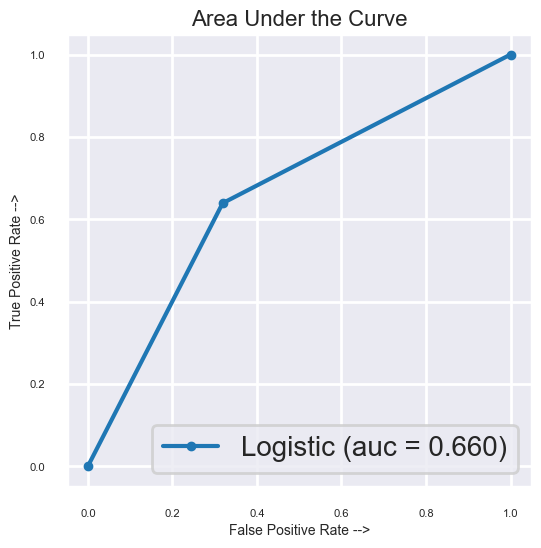

In [ ]:
#Plot ROC and compare AUC

from sklearn.metrics import roc_curve, auc

logistic_fpr, logistic_tpr, threshold = roc_curve(y1_test, y1_pred)
auc_logistic = auc(logistic_fpr, logistic_tpr)

# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(6,6), dpi=100)

# Set label for x-axis
ax.set_xlabel( "False Positive Rate -->" , size = 10 )
  
# Set label for y-axis
ax.set_ylabel( "True Positive Rate -->" , size = 10 )

# Set title for figure
plt.title( "Area Under the Curve" , size = 16 )

#Set axis parameter font size
plt.tick_params(axis='both', which='major', labelsize=8)

#Set Legend Size
plt.rc('legend',fontsize=20) # using a size in points

plt.plot(logistic_fpr, logistic_tpr, marker='.', label='Logistic (auc = %0.3f)' % auc_logistic)



plt.legend()

plt.show()

In [ ]:
##MERGE DATA 1
#Applying Random forest classifier in Mer_Data1
from sklearn.ensemble import RandomForestClassifier
# Create an instance of Random Forest Classifier

#forest = RandomForestClassifier(criterion='gini',
#                                 n_estimators=5,
#                                 random_state=1,
#                                 n_jobs=2)

#OR


forest = RandomForestClassifier(criterion='entropy',
                                 n_estimators=5,
                                 random_state=0,)

# Fit the model

forest.fit(x1_train, y1_train)

# Measure model performance
#
y_pred = forest.predict(x1_test)
print('Accuracy: %.3f' % accuracy_score(y1_test, y1_pred))

Accuracy: 0.660


C:\Users\hp\AppData\Local\Temp\ipykernel_9052\3846862401.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(x1_train, y1_train)


### Increase number of trees
### rebalance the original promo data using the class_weight parameter
### try different max_features - the default one is probably 3 max features

In [ ]:
##MERGE DATA 2
forest = RandomForestClassifier(criterion='entropy',
                                 n_estimators=5,
                                 random_state=0,)

# Fit the model

forest.fit(x2_train, y2_train)

# Measure model performance
#
y_pred = forest.predict(x2_test)
print('Accuracy: %.3f' % accuracy_score(y2_test, y2_pred))

Accuracy: 0.660


C:\Users\hp\AppData\Local\Temp\ipykernel_9052\3579729110.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(x2_train, y2_train)


In [ ]:
##MERGE DATA 2
forest = RandomForestClassifier(criterion='entropy',
                                 n_estimators=5,
                                 random_state=0,)

# Fit the model

forest.fit(x3_train, y3_train)

# Measure model performance
#
y_pred = forest.predict(x3_test)
print('Accuracy: %.3f' % accuracy_score(y3_test, y3_pred))

Accuracy: 0.660


C:\Users\hp\AppData\Local\Temp\ipykernel_9052\879283829.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(x3_train, y3_train)


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print (classification_report(y1_test, y1_pred))

              precision    recall  f1-score   support

           0       0.65      0.68      0.66      1154
           1       0.67      0.64      0.66      1180

    accuracy                           0.66      2334
   macro avg       0.66      0.66      0.66      2334
weighted avg       0.66      0.66      0.66      2334

